First date in the dataset: 2019-01-01 00:02:46
Last date in the dataset: 2021-04-01 06:39:59


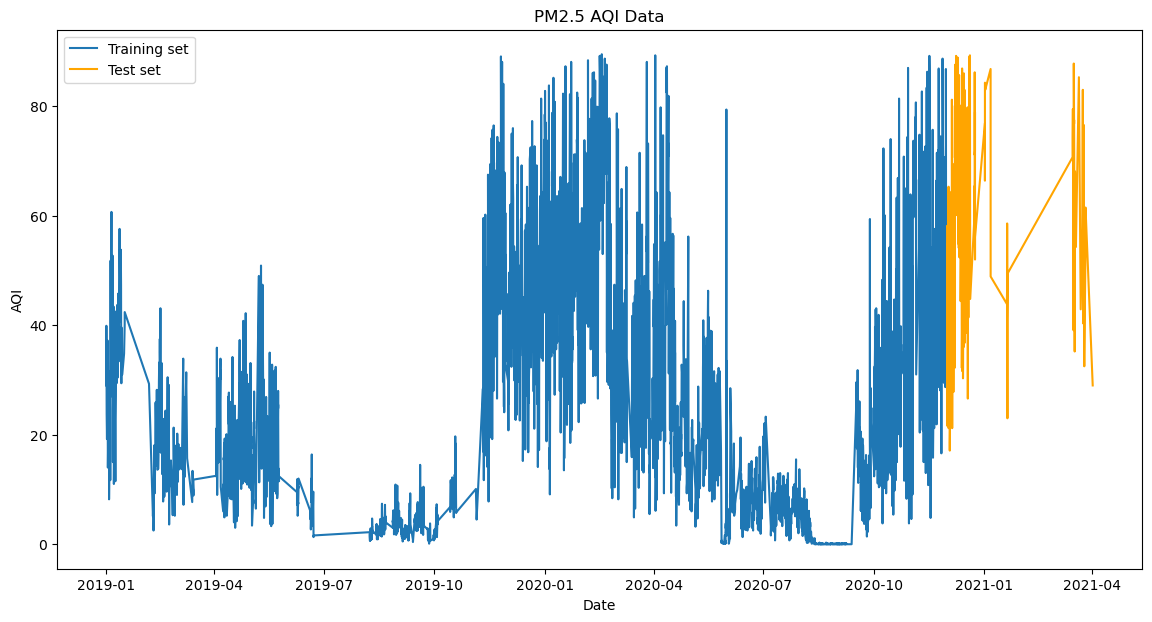

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv("PM1_cleaned.csv")

# Convert the 'datetime' column to datetime format and set it as the index
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Check the first and last dates in the dataset
print("First date in the dataset:", data.index.min())
print("Last date in the dataset:", data.index.max())

# Split the data into training and test sets
train = data[data.index < '2020-12-01']
test = data[data.index >= '2020-12-01']

# Visualize the training and test sets
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['value'], label='Training set')
plt.plot(test.index, test['value'], label='Test set', color='orange')
plt.title('PM2.5 AQI Data')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()


/Users/anuprajpaudel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anuprajpaudel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anuprajpaudel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


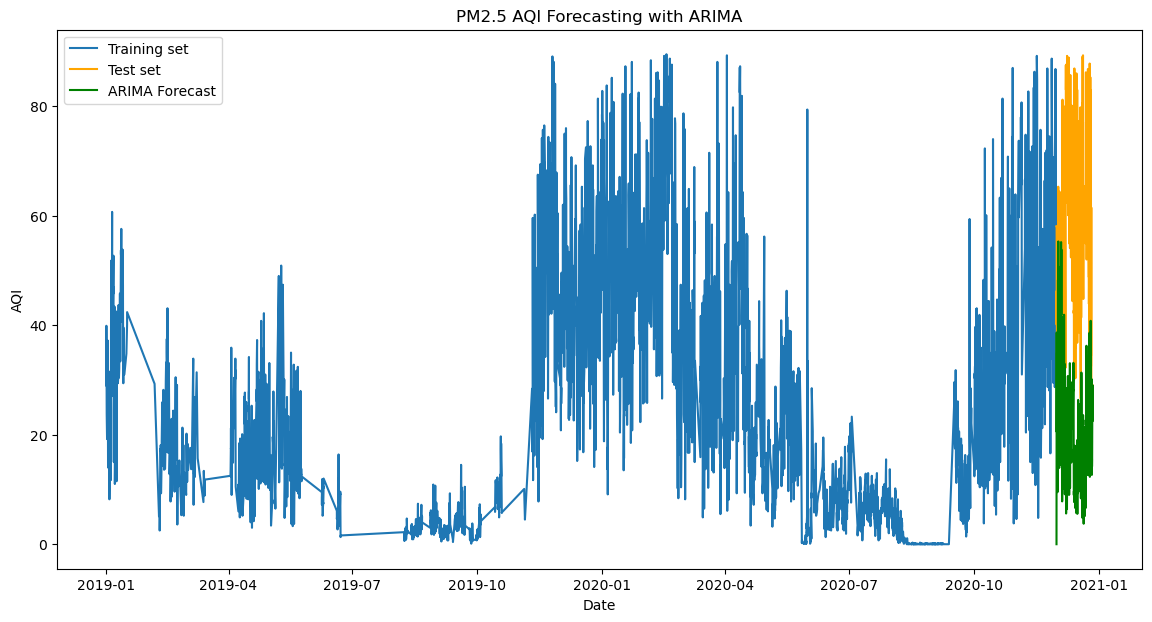

Mean Absolute Error (MAE): 36.90583589046985
Mean Absolute Percentage Error (MAPE): 0.6317339198540097


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model to the training data
arima_model = ARIMA(train['value'], order=(5,1,0))
arima_result = arima_model.fit()

# Reset index of the test data
test.reset_index(drop=True, inplace=True)
test.index = pd.date_range(start=train.index[-1], periods=len(test), freq='H')

# Make predictions on the test set
arima_forecast = arima_result.predict(start=0, end=len(test)-1, typ='levels')

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['value'], label='Training set')
plt.plot(test.index, test['value'], label='Test set', color='orange')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.title('PM2.5 AQI Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['value'], arima_forecast)
print("Mean Absolute Error (MAE):", mae)
mape = mean_absolute_percentage_error(test['value'], arima_forecast)
print("Mean Absolute Percentage Error (MAPE):", mape)